1. Membaca dan Menjelajahi Dataset

5 baris pertama dari dataset:
   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      

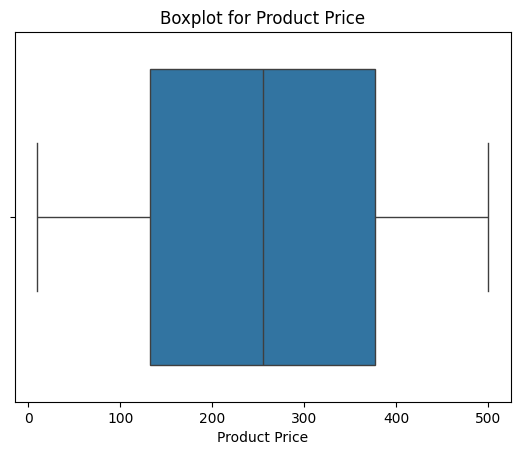

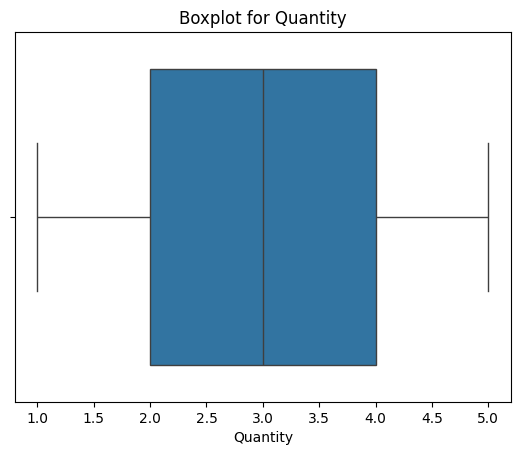

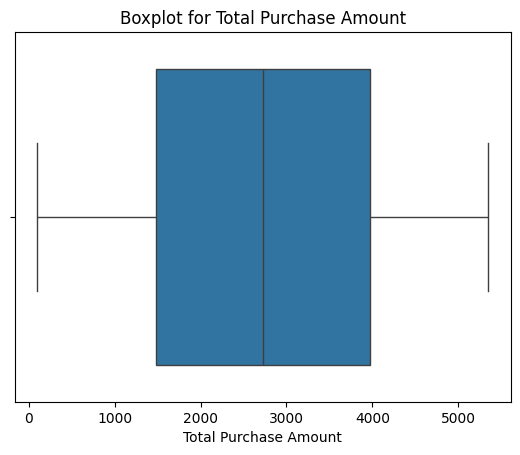

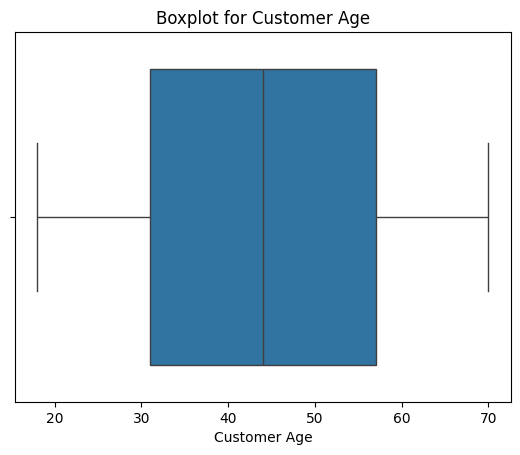

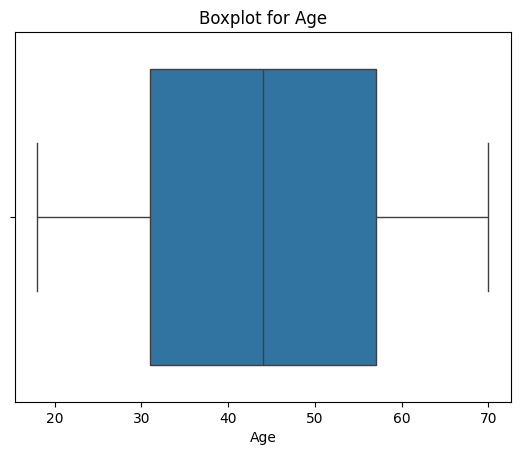

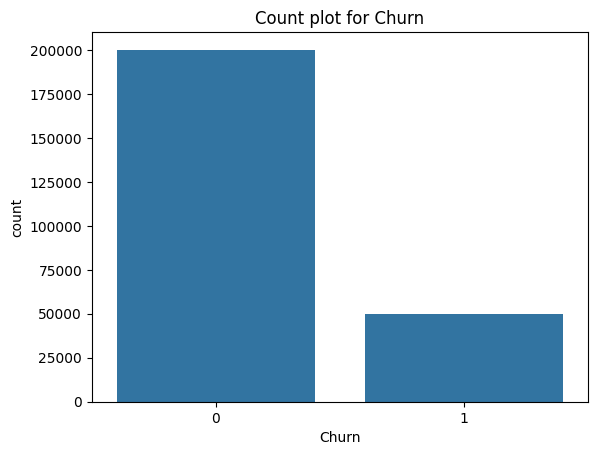

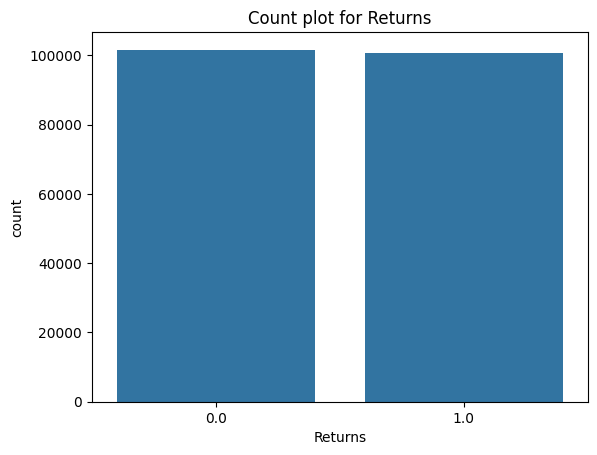

In [14]:
# Library Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca file CSV yang diberikan.
df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

# Tampilkan 5 baris pertama.
print("5 baris pertama dari dataset:")
print(df.head(5))

# Lihat struktur (info()), tipe data, dan ringkasan statistik (describe()).
print("\nStruktur dan ringkasan statistik dari dataset:")
print(f"\n {df.info()}")
print(f"\n {df.describe()}")

# Cek distribusi target (value_counts()).
print(f"\nJumlah data: {df['Customer ID'].value_counts().sum()}")

# Cek outliers.
print(f"\nData kosong: ")
print(df.isnull().sum())
print(f"\nData duplikat: {df.duplicated().sum()}")

# Visualisasi distribusi data
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col != 'Churn' and col != 'Customer ID' and col != 'Returns':
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

sns.countplot(x='Churn', data=df)
plt.title(f'Count plot for Churn')
plt.show()

sns.countplot(x='Returns', data=df)
plt.title(f'Count plot for Returns')
plt.show()

2. Pembersihan Data

In [15]:
# Imputasi median untuk nilai hilang
print(f"Median: {df['Returns'].median()}")
df['Returns'] = df['Returns'].fillna(df['Returns'].median())

print(f"\nData kosong: ")
print(df.isnull().sum())

df = df.drop_duplicates()


Median: 0.0

Data kosong: 
Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


3. Encoding Fitur Kategorikal

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender Encoded'] = le.fit_transform(df['Gender'])
df_encoded = pd.get_dummies(df, columns=['Product Category', 'Payment Method'])
df_encoded.head(5)

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Customer Name,Age,Gender,Churn,Gender Encoded,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Crypto,Payment Method_PayPal
0,46251,2020-09-08 09:38:32,12,3,740,37,0.0,Christine Hernandez,37,Male,0,1,False,False,True,False,False,True,False,False
1,46251,2022-03-05 12:56:35,468,4,2739,37,0.0,Christine Hernandez,37,Male,0,1,False,False,False,True,False,False,False,True
2,46251,2022-05-23 18:18:01,288,2,3196,37,0.0,Christine Hernandez,37,Male,0,1,False,False,False,True,False,False,False,True
3,46251,2020-11-12 13:13:29,196,1,3509,37,0.0,Christine Hernandez,37,Male,0,1,False,True,False,False,False,False,False,True
4,13593,2020-11-27 17:55:11,449,1,3452,49,0.0,James Grant,49,Female,1,0,False,False,False,True,False,True,False,False


4. Transformasi Fitur (Scaling)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_cols = [
	'Product Price', 'Quantity', 'Total Purchase Amount', 'Returns', 'Age', 'Gender Encoded',
	'Product Category_Books', 'Product Category_Clothing', 'Product Category_Electronics', 'Product Category_Home',
	'Payment Method_Cash', 'Payment Method_Credit Card', 'Payment Method_Crypto', 'Payment Method_PayPal'
]
X = df_encoded[feature_cols]
y = df_encoded['Churn']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

[[0.00408163 0.5        0.12190476 0.         0.36538462 1.
  0.         0.         1.         0.         0.         1.
  0.         0.        ]
 [0.93469388 0.75       0.50266667 0.         0.36538462 1.
  0.         0.         0.         1.         0.         0.
  0.         1.        ]
 [0.56734694 0.25       0.58971429 0.         0.36538462 1.
  0.         0.         0.         1.         0.         0.
  0.         1.        ]
 [0.37959184 0.         0.64933333 0.         0.36538462 1.
  0.         1.         0.         0.         0.         0.
  0.         1.        ]
 [0.89591837 0.         0.63847619 0.         0.59615385 0.
  0.         0.         0.         1.         0.         1.
  0.         0.        ]]


5. Penanganan Data Imbalanced

In [ ]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

6. K-Fold Cross Validation dan Pelatihan Model

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_over, y_over)
y_pred = model.predict(X_test)

7. Evaluasi Akhir

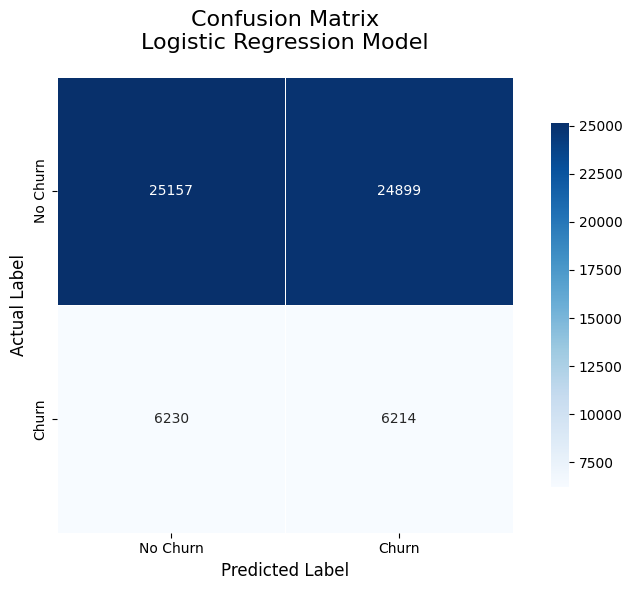


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62     50056
           1       0.20      0.50      0.29     12444

    accuracy                           0.50     62500
   macro avg       0.50      0.50      0.45     62500
weighted avg       0.68      0.50      0.55     62500


Accuracy: 0.50
Precision: 0.20
Recall: 0.50
F1-Score: 0.29


In [28]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = ['No Churn', 'Churn']  
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cnf_matrix, 
            annot=True, 
            fmt='d', 
            cmap="Blues",
            square=True,  
            linewidths=0.5,  
            cbar_kws={"shrink": .8}, 
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix\nLogistic Regression Model', fontsize=16, pad=20)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

print(f"\nAccuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {metrics.f1_score(y_test, y_pred):.2f}")